In [ ]:
#Varvara Yakovleva

In [90]:
import pandas as pd
import numpy as np
import csv
import random as rnd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

## Read file into dataframe

In [91]:
df = pd.read_csv("regLinPoli2.csv") ##insert your own path

In [92]:
##df

## Divide in train and test

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[[df.columns[-1]]], train_size=0.75)
#print X_train.columns.values

### I recommend that after manipulating data using pandas and before modelling to convert dataframes into arrays. This may avoid some headaches

In [94]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
Y_train=np.asarray(Y_train)
Y_test=np.asarray(Y_test)

## Procedure for data standardizing

In [95]:
# This procedure is useful for classroom examples. For a real implementation you have to have a separete method 
# for transforming the production data so you can transform it as you get it with the fitted scaler
## The procedure returns a standardized copy of the input data
def normalize(X_train,X_test,Y_train,Y_test,do=True):

    scale_X=preprocessing.StandardScaler()
    scale_y=preprocessing.StandardScaler()
    
    train_X=np.copy(X_train)
    train_y=np.copy(Y_train)
    test_X=np.copy(X_test)
    test_y=np.copy(Y_test)
    if do:
        scale_X.fit(train_X)
        scale_y.fit(train_y)
        train_X=scale_X.transform(train_X)
        train_y=scale_y.transform(train_y)
        test_X=scale_X.transform(test_X)
        test_y=scale_y.transform(test_y)
    return train_X,test_X, train_y, test_y

## Incremental regularized regression procedures

In [96]:
## Transfer function
def salida(w,X):
    return X.dot(w[1:]) +w[0]


In [97]:
## Training function
def entrena(X,y,w,la=0.0,eta=0.01):
    
    for i in range(len(X)):
        error=y[i]-salida(w,X[i])
        w[0]=w[0]+eta*(error)
        w[1:]=w[1:]+eta*(error*X[i])-la*w[1:]
    return w


## Error function

In [98]:
def calcError(X,y,w,w0):
    return np.mean((X.dot(w)+w0-y)**2)

## Use

In [99]:
train_X,test_X,train_y,test_y=normalize(X_train,X_test,Y_train,Y_test)

In [100]:
w=np.asarray([rnd.random() for i in range(1+len(train_X[0]))])
for i in range(100):
    w=entrena(train_X,train_y,w,la=0.00)

In [101]:
## flatten here to convert y from a matrix to a vector. Only 1 response variable
print calcError(train_X,train_y.flatten(),w[1:],w[0])
print calcError(test_X,test_y.flatten(),w[1:],w[0])

0.533977604271
0.703713982359


# Exercise

In [102]:
## complexity = 1- lambda  x error 

In [109]:
#divide train set into 5 subsets randomly
index=np.array([1 if rnd.random() < 0.2 else 2 if rnd.random() < 0.4 else 3 if rnd.random() < 0.6 else 4 if rnd.random() < 0.8 else 5 for i in range(len(X_train))])

X_test1=np.array(X_train)[index==1]
Y_test1=np.array(Y_train)[index==1]
X_test2=np.array(X_train)[index==2]
Y_test2=np.array(Y_train)[index==2]
X_test3=np.array(X_train)[index==3]
Y_test3=np.array(Y_train)[index==3]
X_test4=np.array(X_train)[index==4]
Y_test4=np.array(Y_train)[index==4]
X_test5=np.array(X_train)[index==5]
Y_test5=np.array(Y_train)[index==5]

#define future train sets
X_train1=np.vstack((X_test2, X_test3, X_test4, X_test5))
Y_train1=np.vstack((Y_test2, Y_test3, Y_test4, Y_test5))
    
X_train2=np.vstack((X_test1, X_test3, X_test4, X_test5))
Y_train2=np.vstack((Y_test1, Y_test3, Y_test4, Y_test5))

    
X_train3=np.vstack((X_test2, X_test1, X_test4, X_test5))
Y_train3=np.vstack((Y_test2, Y_test1, Y_test4, Y_test5))
    
X_train4=np.vstack((X_test2, X_test3, X_test1, X_test5))
Y_train4=np.vstack((Y_test2, Y_test3, Y_test1, Y_test5))
    
X_train5=np.vstack((X_test2, X_test3, X_test4, X_test1))
Y_train5=np.vstack((Y_test2, Y_test3, Y_test4, Y_test1))

#define lambdas 
lam = [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.015, 0.02, 0.03, 0.04]
lam = np.array(lam)

In [110]:
#for each lambda have 5 trainings where 1 train set is a test set, calculate the error
errlam = []
for i in range(len(lam)):
    
    train_X1,test_X1,train_y1,test_y1=normalize(X_train1,X_test1,Y_train1,Y_test1)
    
    w=np.asarray([rnd.random() for k in range(1+len(train_X1[0]))])
    for m in range(10):
            w=entrena(train_X1,train_y1,w,la= lam[i])
    err1 = calcError(test_X1,test_y1.flatten(),w[1:],w[0])
    
    
    train_X2,test_X2,train_y2,test_y2=normalize(X_train2,X_test2,Y_train2,Y_test2)
    
    w=np.asarray([rnd.random() for k in range(1+len(train_X2[0]))])
    for m in range(10):
        w=entrena(train_X2,train_y2,w,la= lam[i])
    err2 = calcError(test_X2,test_y2.flatten(),w[1:],w[0])
    
    
    train_X3,test_X3,train_y3,test_y3=normalize(X_train3,X_test3,Y_train3,Y_test3)
    
    w=np.asarray([rnd.random() for k in range(1+len(train_X3[0]))])
    for m in range(10):
        w=entrena(train_X3,train_y3,w,la= lam[i])
    err3 = calcError(test_X3,test_y3.flatten(),w[1:],w[0])
    
    
    train_X4,test_X4,train_y4,test_y4=normalize(X_train4,X_test4,Y_train4,Y_test4)
    
    w=np.asarray([rnd.random() for k in range(1+len(train_X4[0]))])
    for m in range(10):
        w=entrena(train_X4,train_y4,w,la= lam[i])
    err4 = calcError(test_X4,test_y4.flatten(),w[1:],w[0])
    
    
    train_X5,test_X5,train_y5,test_y5=normalize(X_train5,X_test5,Y_train5,Y_test5)
    
    w=np.asarray([rnd.random() for k in range(1+len(train_X5[0]))])
    for m in range(10):
        w=entrena(train_X5,train_y5,w,la= lam[i])
    err5 = calcError(test_X5,test_y5.flatten(),w[1:],w[0])
    
    errlam.append((err1+err2+err3+err4+err5)/float(5))

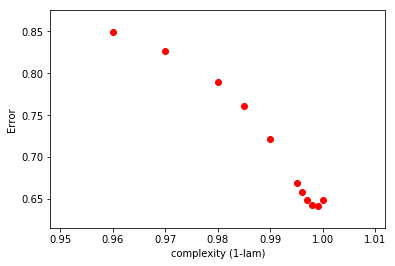

In [111]:
plt.scatter(1-lam, errlam, color = 'red')
plt.ylabel("Error")
plt.xlabel("complexity (1-lam)")
plt.show()

[None, None, None, None, None, None, None, None, None, None, None]
